# 1112_DS_Lab5 資料合併與時間序列資料視覺化呈現

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#在Jupyter Notebook上顯示圖表所必需的　magic command
%matplotlib inline

# 整體目標：選取國泰北美科技與台積電的收盤價並繪製趨勢圖

# 工具：concat，merge，空值處理


##  一、爬取資料


##  目標：使用迴圈爬取365天的股市資料，並銜接在一起。
## pd.concat()  
將兩個DataFrame依照自己的條件連接在一起

In [13]:
data_a = pd.DataFrame([[0, 1, 2], [3, 4, 5], [6, 7, 8]],columns = ['key','A','B'])
data_b = pd.DataFrame([[0, 1, 0], [3, 1, 0], [6, 0, 1],[9, 1, 2]],columns = ['key','A','B'])
data_c = pd.DataFrame([[0, 1], [3, 4], [6, 7]],columns = ['key','A'])

In [14]:
display(data_a)
display(data_b)
display(data_c)

,key,A,B
0,0,1,2
1,3,4,5
2,6,7,8


,key,A,B
0,0,1,0
1,3,1,0
2,6,0,1
3,9,1,2


,key,A
0,0,1
1,3,4
2,6,7


In [15]:
# concat 使用 join 設定
# join 有兩種模式，分別為 inner, outer
# result = pd.concat([data_a,data_b])             # 預設 axis=0
result = pd.concat([data_a,data_b], join='outer')   
#  concat 預設的 join 模式是 'outer'，會直接把沒有的資料用 NaN 代替
#  concat 的 join 模式為 'inner'，會直接把沒有完整資料的刪除
print(result)

   key  A  B
0    0  1  2
1    3  4  5
2    6  7  8
0    0  1  0
1    3  1  0
2    6  0  1
3    9  1  2


In [17]:
result = pd.concat([data_a,data_c], join='outer')
print(result)

   key  A    B
0    0  1  2.0
1    3  4  5.0
2    6  7  8.0
0    0  1  NaN
1    3  4  NaN
2    6  7  NaN


In [18]:
result = pd.concat([data_a,data_c], join='inner')
print(result)

   key  A
0    0  1
1    3  4
2    6  7
0    0  1
1    3  4
2    6  7


In [19]:
result = pd.concat([data_a,data_b], join='inner', ignore_index=True)
# ignore_index = True 可以忽略合併時舊的 index 欄位，改採用自動產生的 index
print(result)

   key  A  B
0    0  1  2
1    3  4  5
2    6  7  8
3    0  1  0
4    3  1  0
5    6  0  1
6    9  1  2


In [13]:
#垂直併接　　(keys構建分層索引使用通過的鍵作為最外面的級別)
pd.concat([data_a,data_b],keys=['x','y'])

key  A  B
x 0    0  1  2
  1    3  4  5
  2    6  7  8
y 0    0  1  0
  1    3  1  0
  2    6  0  1
  3    9  1  2

In [21]:
#橫向併接
pd.concat([data_a,data_b],keys=['x','y'],axis = 1)

x             y      
   key    A    B key  A  B
0  0.0  1.0  2.0   0  1  0
1  3.0  4.0  5.0   3  1  0
2  6.0  7.0  8.0   6  0  1
3  NaN  NaN  NaN   9  1  2

## 實例：

## Notes : 如果同時爬取過多資料，伺服器會誤以為是網路攻擊而將該IP封鎖至少一天，所以建議使用 time套件裡的 time.sleep()來延遲抓取 ，請同學實作時避免同時間大量下載資料。

In [22]:
import requests
import time
import datetime

In [23]:
data = pd.DataFrame()

In [24]:
first_date = datetime.date(2023,1,1)
print(first_date)
date = str(first_date).replace('-','') 
print (date)

2023-01-01
20230101


In [25]:
#設置初始日期
first_date = datetime.date(2023,1,3)
for i in range(0,10,1):
    
    # 可以使用下一行程式來看程式是否有在執行
    print(first_date,end='\t')
    
    #加datetime格式轉成string
    date = str(first_date).replace('-','')
    
    #爬取程式 詳情請參考LAB2
    url = f'https://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date={date}&type=ALLBUT0999'
    response = requests.get(url)
    response_json = response.json()
    if response_json['stat']=='OK':
        stock = pd.DataFrame(response_json['data9'], 
                     columns=response_json['fields9'])
        stock['date'] = first_date
        data = pd.concat([data,stock])
        
    # 利用 datetime格式使日期加1天  datetime格式會自動進位月分與年份 
    first_date = first_date + datetime.timedelta(days=1)
    
    # *****非常重要*****
    # *****非常重要*****
    # *****非常重要*****
    # 將程式延遲5秒在執行下一次迴圈
    time.sleep(5)

2023-01-03	2023-01-04	2023-01-05	2023-01-06	2023-01-07	2023-01-08	2023-01-09	2023-01-10	2023-01-11	2023-01-12	

In [26]:
print(data)

      證券代號      證券名稱        成交股數    成交筆數           成交金額     開盤價     最高價  \
0     0050    元大台灣50  15,272,877  13,899  1,673,263,794  109.60  110.90   
1     0051   元大中型100      59,406     148      3,033,756   51.25   51.50   
2     0052      富邦科技     284,445     403     26,319,413   92.00   93.50   
3     0053      元大電子       7,014   1,006        361,840   51.70   52.35   
4     0055  元大MSCI金融      92,843     307      1,984,374   21.46   21.52   
...    ...       ...         ...     ...            ...     ...     ...   
1176  9944        新麗      49,616      40      1,013,718   20.45   20.45   
1177  9945       潤泰新   3,743,057   2,517    162,718,125   43.50   43.90   
1178  9946      三發地產      35,132      22        424,040   12.10   12.15   
1179  9955        佳龍     841,751     568     17,995,326   21.40   21.80   
1180  9958       世紀鋼   2,734,526   3,015    255,646,190   93.50   94.70   

         最低價     收盤價                      漲跌(+/-)  漲跌價差  最後揭示買價 最後揭示買量  \
0     108.45  110.75    <

In [27]:
#請爬取完後進行輸出保存，以免未來需要從重新使用原始資料
# data.to_csv('../data_science_data.csv')
data.to_csv('data_science_data.csv')

In [28]:
pwd

'C:\\Users\\user\\Desktop\\1112_DS_Lab5'

In [25]:
#請用絕對位置，相對路徑會導向安裝anaconda的地方
data = pd.read_csv('C:\\Users\\user\\Desktop\\1112_DS_Lab\\1112_DS_Lab5\\data_science_data.csv',index_col=0)

In [29]:
data

,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,date
0,0050,元大台灣50,"15,272,877","13,899","1,673,263,794",109.60,110.90,108.45,110.75,<p style= color:red>+</p>,0.55,110.70,34,110.75,17,0.00,2023-01-03
1,0051,元大中型100,"59,406",148,"3,033,756",51.25,51.50,50.80,51.40,<p style= color:red>+</p>,0.15,51.25,2,51.50,1,0.00,2023-01-03
2,0052,富邦科技,"284,445",403,"26,319,413",92.00,93.50,91.40,93.30,<p style= color:red>+</p>,0.80,93.20,25,93.30,4,0.00,2023-01-03
3,0053,元大電子,"7,014","1,006","361,840",51.70,52.35,51.40,52.35,<p style= color:red>+</p>,0.95,52.35,1,52.65,16,0.00,2023-01-03
4,0055,元大MSCI金融,"92,843",307,"1,984,374",21.46,21.52,21.23,21.49,<p style= color:green>-</p>,0.01,21.49,1,21.53,2,0.00,2023-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,9944,新麗,"49,616",40,"1,013,718",20.45,20.45,20.25,20.45,<p> </p>,0.00,20.35,1,20.45,8,4.20,2023-01-12
1177,9945,潤泰新,"3,743,057","2,517","162,718,125",43.50,43.90,43.20,43.30,<p style= color:green>-</p>,0.05,43.25,59,43.30,32,5.70,2023-01-12
1178,9946,三發地產,"35,132",22,"424,040",12.10,12.15,12.05,12.05,<p style= color:green>-</p>,0.10,12.00,37,12.05,6,23.17,2023-01-12
1179,9955,佳龍,"841,751",568,"17,995,326",21.40,21.80,21.15,21.25,<p style= color:green>-</p>,0.15,21.20,5,21.25,1,0.00,2023-01-12


# 二、資料清理

## 目標：整理出一個DataFrame 包含日期、國泰北美科技收盤價、台積電收盤價

In [30]:
#只取出想要的columns
data = data[['date','證券名稱','收盤價']]

In [31]:
data

,date,證券名稱,收盤價
0,2023-01-03,元大台灣50,110.75
1,2023-01-03,元大中型100,51.40
2,2023-01-03,富邦科技,93.30
3,2023-01-03,元大電子,52.35
4,2023-01-03,元大MSCI金融,21.49
...,...,...,...
1176,2023-01-12,新麗,20.45
1177,2023-01-12,潤泰新,43.30
1178,2023-01-12,三發地產,12.05
1179,2023-01-12,佳龍,21.25


In [32]:
#把收盤價改為英文標題，未來處理其他程序時才不會有警告圖示
data = data.rename(columns = {'證券名稱':'name'})
data = data.rename(columns = {'收盤價':'closing_price'})

In [34]:
data.describe()

,date,name,closing_price
count,9448,9448,9448
unique,8,1181,2769
top,2023-01-04,怡利電,--
freq,1181,8,133


### 轉換收盤價的資料型態(object -> float)，詳情請參考lab3。轉換目的：未來在繪圖時float型態才可運行

In [35]:
data['closing_price'] = data['closing_price'].replace({'\$': '', ',': '', '--':np.nan}, regex=True)
data['closing_price'] = data['closing_price'].astype('float64')

In [36]:
data.describe()

,closing_price
count,9315.000000
mean,59.590253
std,118.340166
min,1.120000
25%,17.150000
50%,30.200000
75%,58.900000
max,2225.000000


## merge()
將兩個DataFrame依照設定的key組合在一起.

In [37]:
data_a = pd.DataFrame([[0, 1, 2], [3, 4, 5], [6, 7, 8]],columns = ['key','A','B'])
data_b = pd.DataFrame([[0, 1, 0], [3, 1, 0], [6, 0, 1],[9, 1, 2]],columns = ['key','A','B'])

In [38]:
display(data_a)
display(data_b)

,key,A,B
0,0,1,2
1,3,4,5
2,6,7,8


,key,A,B
0,0,1,0
1,3,1,0
2,6,0,1
3,9,1,2


### on參數：依照設定參數當作key進行合併

### how參數：有left(依照輸入左側的df進行合併)、right(右側)、inner(取交集)、outer(取聯集)

In [39]:
pd.merge(data_a,data_b,on='key',how='left')

,key,A_x,B_x,A_y,B_y
0,0,1,2,1,0
1,3,4,5,1,0
2,6,7,8,0,1


#### suffixes參數：更改後綴名稱

In [40]:
pd.merge(data_a,data_b,on='key',how='left', suffixes=('_a', '_b'))

,key,A_a,B_a,A_b,B_b
0,0,1,2,1,0
1,3,4,5,1,0
2,6,7,8,0,1


## 實例：

## 把國泰北美科技的資料與台積電的資料進行合併

In [41]:
data_ETF = data[data['name']=='國泰北美科技']

In [42]:
data_TSMC = data[data['name']=='台積電']

In [43]:
display(data_ETF)
display(data_TSMC)

,date,name,closing_price
102,2023-01-03,國泰北美科技,26.99
102,2023-01-04,國泰北美科技,27.04
102,2023-01-05,國泰北美科技,27.22
102,2023-01-06,國泰北美科技,26.74
102,2023-01-09,國泰北美科技,27.42
102,2023-01-10,國泰北美科技,27.38
102,2023-01-11,國泰北美科技,27.69
102,2023-01-12,國泰北美科技,28.28


,date,name,closing_price
453,2023-01-03,台積電,453.0
453,2023-01-04,台積電,449.5
453,2023-01-05,台積電,458.5
453,2023-01-06,台積電,458.5
453,2023-01-09,台積電,481.0
453,2023-01-10,台積電,486.0
453,2023-01-11,台積電,484.5
453,2023-01-12,台積電,486.5


In [44]:
# 以後不須使用的證券名稱，所以先行丟掉
data_ETF = data_ETF.drop('name',axis = 1)
data_TSMC = data_TSMC.drop('name',axis = 1)

In [45]:
display(data_ETF)
display(data_TSMC)

,date,closing_price
102,2023-01-03,26.99
102,2023-01-04,27.04
102,2023-01-05,27.22
102,2023-01-06,26.74
102,2023-01-09,27.42
102,2023-01-10,27.38
102,2023-01-11,27.69
102,2023-01-12,28.28


,date,closing_price
453,2023-01-03,453.0
453,2023-01-04,449.5
453,2023-01-05,458.5
453,2023-01-06,458.5
453,2023-01-09,481.0
453,2023-01-10,486.0
453,2023-01-11,484.5
453,2023-01-12,486.5


In [46]:
data = pd.merge(data_ETF,data_TSMC,on='date',how = 'left',suffixes=('_ETF','_TSMC'))

In [51]:
data

,date,closing_price_ETF,closing_price_TSMC
0,2022-01-03,40.46,631.0
1,2022-01-04,40.54,656.0
2,2022-01-05,39.81,650.0
3,2022-01-06,38.48,644.0
4,2022-01-07,38.79,634.0
5,2022-01-10,38.53,643.0
6,2022-01-11,38.39,651.0
7,2022-01-12,38.95,660.0


In [47]:
data.describe()

,closing_price_ETF,closing_price_TSMC
count,8.000000,8.000000
mean,27.345000,469.687500
std,0.478211,16.179655
min,26.740000,449.500000
25%,27.027500,457.125000
50%,27.300000,469.750000
75%,27.487500,484.875000
max,28.280000,486.500000


# 空值處理

## 範例

In [48]:
data_a = pd.DataFrame([[0, 1, 2], [3, 4, 5], [11, 7, 8]],columns = ['key','A','B'])
data_b = pd.DataFrame([[0, 1, 0], [2, 1, 0], [6, 0, 1],[9, 1, 2]],columns = ['key','A','B'])

In [49]:
print(data_a)
print(data_b)

   key  A  B
0    0  1  2
1    3  4  5
2   11  7  8
   key  A  B
0    0  1  0
1    2  1  0
2    6  0  1
3    9  1  2


In [50]:
data_test = pd.merge(data_a,data_b,on='key',how = 'outer')
data_test

,key,A_x,B_x,A_y,B_y
0,0,1.0,2.0,1.0,0.0
1,3,4.0,5.0,NaN,NaN
2,11,7.0,8.0,NaN,NaN
3,2,NaN,NaN,1.0,0.0
4,6,NaN,NaN,0.0,1.0
5,9,NaN,NaN,1.0,2.0


## dropna 將有空值的row刪除

In [51]:
data_test.dropna()

,key,A_x,B_x,A_y,B_y
0,0,1.0,2.0,1.0,0.0


In [55]:
data_test.dropna(axis='columns')

,key
0,0
1,3
2,11
3,2
4,6
5,9


In [56]:
data_test.dropna(axis='columns', how='all')

,key,A_x,B_x,A_y,B_y
0,0,1.0,2.0,1.0,0.0
1,3,4.0,5.0,NaN,NaN
2,11,7.0,8.0,NaN,NaN
3,2,NaN,NaN,1.0,0.0
4,6,NaN,NaN,0.0,1.0
5,9,NaN,NaN,1.0,2.0


In [63]:
data_test.dropna(axis='rows', thresh=4)

,key,A_x,B_x,A_y,B_y
0,0,1.0,2.0,1.0,0.0


## fillna 將有空值的地方填上想要的值

In [64]:
data_test.fillna(0)

,key,A_x,B_x,A_y,B_y
0,0,1.0,2.0,1.0,0.0
1,3,4.0,5.0,0.0,0.0
2,11,7.0,8.0,0.0,0.0
3,2,0.0,0.0,1.0,0.0
4,6,0.0,0.0,0.0,1.0
5,9,0.0,0.0,1.0,2.0


In [65]:
data_test.fillna(method='ffill')

,key,A_x,B_x,A_y,B_y
0,0,1.0,2.0,1.0,0.0
1,3,4.0,5.0,1.0,0.0
2,11,7.0,8.0,1.0,0.0
3,2,7.0,8.0,1.0,0.0
4,6,7.0,8.0,0.0,1.0
5,9,7.0,8.0,1.0,2.0


In [66]:
data_test.fillna(method='bfill')

,key,A_x,B_x,A_y,B_y
0,0,1.0,2.0,1.0,0.0
1,3,4.0,5.0,1.0,0.0
2,11,7.0,8.0,1.0,0.0
3,2,NaN,NaN,1.0,0.0
4,6,NaN,NaN,0.0,1.0
5,9,NaN,NaN,1.0,2.0


## pd.isnull()  pd.notnull() 產生是否為空值的布林Series

In [67]:
pd.isnull(data_test['A_x'])

0    False
1    False
2    False
3     True
4     True
5     True
Name: A_x, dtype: bool

In [68]:
data_test[pd.isnull(data_test['A_x'])]

,key,A_x,B_x,A_y,B_y
3,2,NaN,NaN,1.0,0.0
4,6,NaN,NaN,0.0,1.0
5,9,NaN,NaN,1.0,2.0


In [69]:
pd.notnull(data_test['A_x'])

0     True
1     True
2     True
3    False
4    False
5    False
Name: A_x, dtype: bool

In [70]:
data_test[pd.notnull(data_test['A_x'])]

,key,A_x,B_x,A_y,B_y
0,0,1.0,2.0,1.0,0.0
1,3,4.0,5.0,NaN,NaN
2,11,7.0,8.0,NaN,NaN


#### 實例：

## 有些股票可能沒有交易資訊，必須清除乾淨

In [71]:
data[pd.isnull(data['closing_price_ETF'])]

,date,closing_price_ETF,closing_price_TSMC


In [72]:
data = data.dropna()

# 三、簡易顯示圖表

## pd.plot()  附註：plot未來會詳細解釋

In [73]:
#df內的資料型態必須一樣，所以使日期當作是index也就是橫坐標
data = data.set_index('date')

In [74]:
data

,closing_price_ETF,closing_price_TSMC
date,,
2023-01-03,26.99,453.0
2023-01-04,27.04,449.5
2023-01-05,27.22,458.5
2023-01-06,26.74,458.5
2023-01-09,27.42,481.0
2023-01-10,27.38,486.0
2023-01-11,27.69,484.5
2023-01-12,28.28,486.5


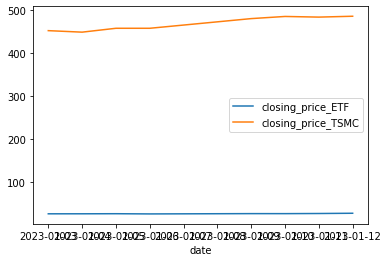

In [75]:
#如果按一次沒顯示，那就再按一次。
data.plot()

In [ ]:
## 作業三 (Due 2023/4/18) 題目一: 請繪製台積電在2022年的收盤價及開盤價的趨勢圖。